In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datacleaner import autoclean
import klib

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')
import datetime

Data Exploration

In [2]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\ML_Lectures\titanic_train.csv")

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


GridSpec(6, 6)

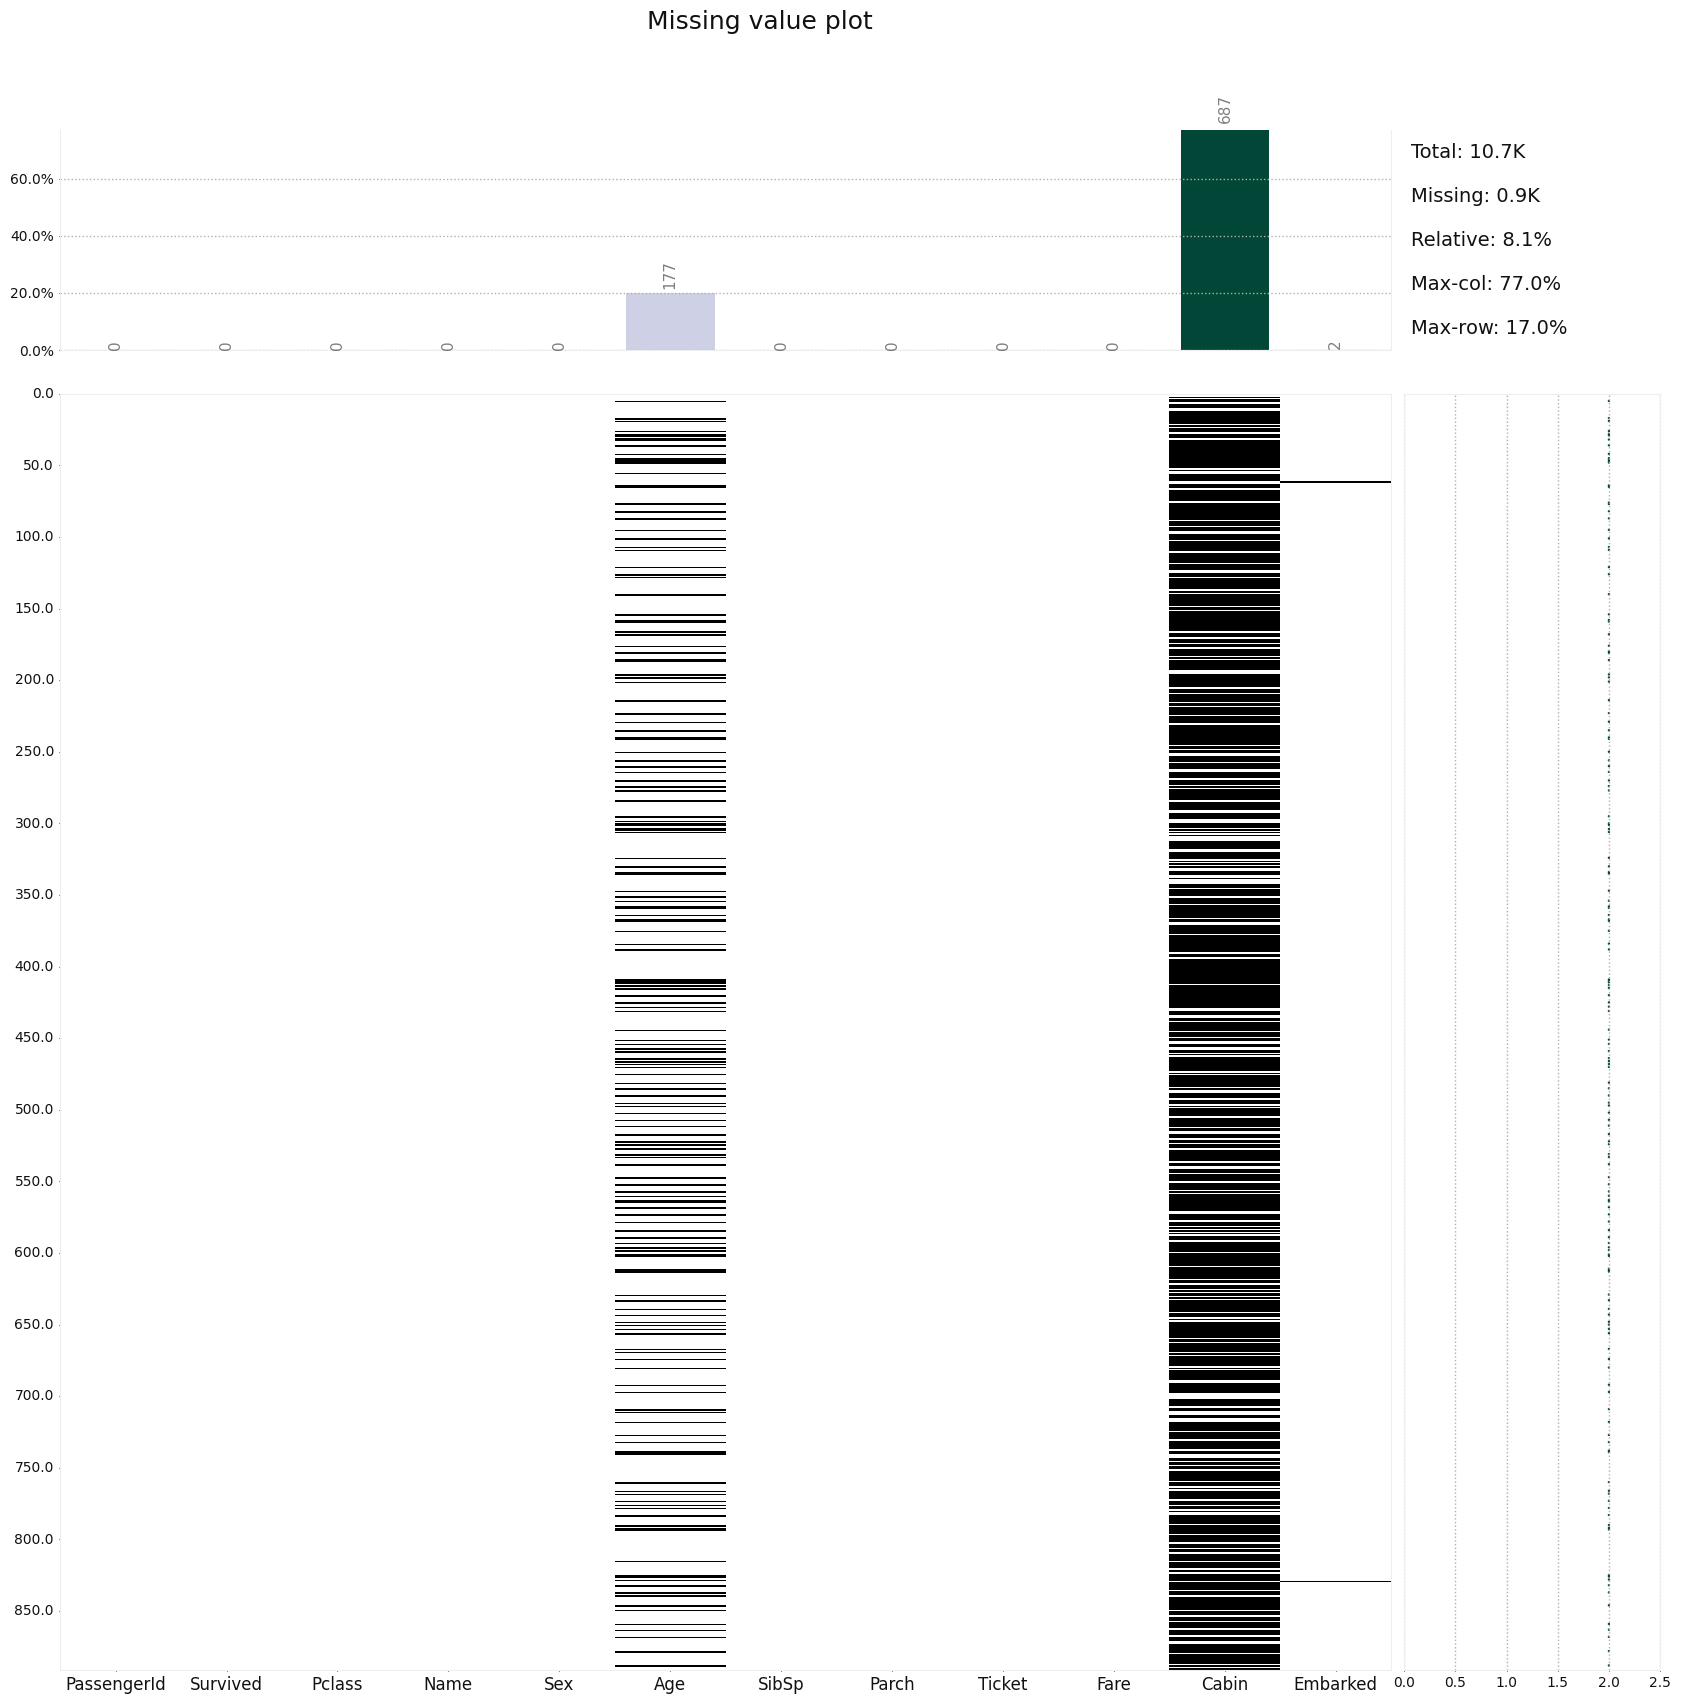

In [15]:
klib.missingval_plot(df)

In [16]:
klib.corr_mat(df)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [3]:
df = klib.data_cleaning(df)

Shape of cleaned data: (891, 12) - Remaining NAs: 866


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.05 MB (-62.5%)



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   passenger_id  891 non-null    int16   
 1   survived      891 non-null    int8    
 2   pclass        891 non-null    int8    
 3   name          891 non-null    string  
 4   sex           891 non-null    category
 5   age           714 non-null    float32 
 6   sib_sp        891 non-null    int8    
 7   parch         891 non-null    int8    
 8   ticket        891 non-null    string  
 9   fare          891 non-null    float32 
 10  cabin         204 non-null    string  
 11  embarked      889 non-null    category
dtypes: category(2), float32(2), int16(1), int8(4), string(3)
memory usage: 35.2 KB


In [25]:
df.isnull().sum()

passenger_id      0
survived          0
pclass            0
name              0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              0
cabin           687
embarked          2
dtype: int64

Data preprocessing - Missing values

In [4]:
for col in df.columns:
  if df[col].dtype in ['object','string','category'] :
    df[col].fillna(df[col].mode()[0], inplace=True)
  else:
    df[col].fillna(df[col].mean(), inplace=True)

In [5]:
df.isnull().sum()

passenger_id    0
survived        0
pclass          0
name            0
sex             0
age             0
sib_sp          0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   passenger_id  891 non-null    int16   
 1   survived      891 non-null    int8    
 2   pclass        891 non-null    int8    
 3   name          891 non-null    string  
 4   sex           891 non-null    category
 5   age           891 non-null    float32 
 6   sib_sp        891 non-null    int8    
 7   parch         891 non-null    int8    
 8   ticket        891 non-null    string  
 9   fare          891 non-null    float32 
 10  cabin         891 non-null    string  
 11  embarked      891 non-null    category
dtypes: category(2), float32(2), int16(1), int8(4), string(3)
memory usage: 35.2 KB


Encoding

In [6]:
for col in df.select_dtypes(include=['string','category']).columns:
  cardinality = df[col].nunique()
  if cardinality <= 5:
    df = pd.get_dummies(df, columns=[col], dtype=int, drop_first=True)
  else:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int16  
 1   survived      891 non-null    int8   
 2   pclass        891 non-null    int8   
 3   name          891 non-null    int64  
 4   age           891 non-null    float32
 5   sib_sp        891 non-null    int8   
 6   parch         891 non-null    int8   
 7   ticket        891 non-null    int64  
 8   fare          891 non-null    float32
 9   cabin         891 non-null    int64  
 10  sex_male      891 non-null    int64  
 11  embarked_Q    891 non-null    int64  
 12  embarked_S    891 non-null    int64  
dtypes: float32(2), int16(1), int64(6), int8(4)
memory usage: 54.1 KB


In [8]:
df.head()

,passenger_id,survived,pclass,name,age,sib_sp,parch,ticket,fare,cabin,sex_male,embarked_Q,embarked_S
0,1,0,3,108,22.0,1,0,523,7.250000,47,1,0,1
1,2,1,1,190,38.0,1,0,596,71.283302,81,0,0,0
2,3,1,3,353,26.0,0,0,669,7.925000,47,0,0,1
3,4,1,1,272,35.0,1,0,49,53.099998,55,0,0,1
4,5,0,3,15,35.0,0,0,472,8.050000,47,1,0,1


Scaling

In [7]:
original_columns = df.columns

In [41]:
original_columns

Index(['passenger_id', 'survived', 'pclass', 'name', 'age', 'sib_sp', 'parch',
       'ticket', 'fare', 'cabin', 'sex_male', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [9]:
scaler = StandardScaler()
df_scale = df.drop(columns=['survived'])
df_target = df['survived']

df_scaled = scaler.fit_transform(df_scale)
df_scaled = pd.DataFrame(df_scaled, columns=df_scale.columns)
df = pd.concat([df_scaled, df_target], axis=1)

In [10]:
df.head()

,passenger_id,pclass,name,age,sib_sp,parch,ticket,fare,cabin,sex_male,embarked_Q,embarked_S,survived
0,-1.730108,0.827377,-1.310217,-0.592481,0.432793,-0.473674,0.918966,-0.502445,-0.281881,0.737695,-0.307562,0.615838,0
1,-1.726220,-1.566107,-0.991410,0.638789,0.432793,-0.473674,1.282625,0.786845,1.161545,-1.355574,-0.307562,-1.623803,1
2,-1.722332,0.827377,-0.357685,-0.284663,-0.474545,-0.473674,1.646283,-0.488854,-0.281881,-1.355574,-0.307562,0.615838,1
3,-1.718444,-1.566107,-0.672604,0.407926,0.432793,-0.473674,-1.442322,0.420730,0.057748,-1.355574,-0.307562,0.615838,1
4,-1.714556,0.827377,-1.671790,0.407926,-0.474545,-0.473674,0.664904,-0.486337,-0.281881,0.737695,-0.307562,0.615838,0


Model Selection

In [24]:
test_df = pd.read_csv(r"C:\Users\Saidabrorkhon\ML_Lectures\titanic_test.csv")

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [31]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
test_df = klib.data_cleaning(test_df)

Shape of cleaned data: (418, 11) - Remaining NAs: 414


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.02 MB (-50.0%)



In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   passenger_id  418 non-null    int16   
 1   pclass        418 non-null    int8    
 2   name          418 non-null    string  
 3   sex           418 non-null    category
 4   age           332 non-null    float32 
 5   sib_sp        418 non-null    int8    
 6   parch         418 non-null    int8    
 7   ticket        418 non-null    string  
 8   fare          417 non-null    float32 
 9   cabin         91 non-null     string  
 10  embarked      418 non-null    category
dtypes: category(2), float32(2), int16(1), int8(3), string(3)
memory usage: 16.3 KB


In [36]:
for col in test_df.columns:
  if test_df[col].dtype in ['string', 'category']:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)
  else:
    test_df[col].fillna(df[col].mean(), inplace=True)

In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   passenger_id  418 non-null    int16   
 1   pclass        418 non-null    int8    
 2   name          418 non-null    string  
 3   sex           418 non-null    category
 4   age           418 non-null    float64 
 5   sib_sp        418 non-null    int8    
 6   parch         418 non-null    int8    
 7   ticket        418 non-null    string  
 8   fare          418 non-null    float64 
 9   cabin         418 non-null    string  
 10  embarked      418 non-null    category
dtypes: category(2), float64(2), int16(1), int8(3), string(3)
memory usage: 19.6 KB


In [40]:
for col in test_df.select_dtypes(include=['string', 'category']).columns:
  cardinality = test_df[col].nunique()
  if cardinality >= 5:
    le = LabelEncoder()
    test_df[col] = le.fit_transform(test_df[col])
  else:
    test_df = pd.get_dummies(test_df, columns=[col], dtype=int, drop_first=True)

In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  418 non-null    int16  
 1   pclass        418 non-null    int8   
 2   name          418 non-null    int64  
 3   age           418 non-null    float64
 4   sib_sp        418 non-null    int8   
 5   parch         418 non-null    int8   
 6   ticket        418 non-null    int64  
 7   fare          418 non-null    float64
 8   cabin         418 non-null    int64  
 9   sex_male      418 non-null    int64  
 10  embarked_Q    418 non-null    int64  
 11  embarked_S    418 non-null    int64  
dtypes: float64(2), int16(1), int64(6), int8(3)
memory usage: 28.3 KB


In [43]:
scaler = StandardScaler()
original_columns = test_df.columns
test_df = scaler.fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=original_columns)
test_df

,passenger_id,pclass,name,age,sib_sp,parch,ticket,fare,cabin,sex_male,embarked_Q,embarked_S
0,-1.727912,0.873482,-0.020718,0.594801,-0.499470,-0.400248,-0.269494,-0.496637,-0.351490,0.755929,2.843757,-1.350676
1,-1.719625,0.873482,1.611889,1.305896,0.616992,-0.400248,0.372934,-0.511497,-0.351490,-1.322876,-0.351647,0.740370
2,-1.711337,-0.315819,0.501385,2.159209,-0.499470,-0.400248,-1.005027,-0.463335,-0.351490,0.755929,2.843757,-1.350676
3,-1.703050,0.873482,1.653326,0.168145,-0.499470,-0.400248,-0.316046,-0.481704,-0.351490,0.755929,-0.351647,0.740370
4,-1.694763,0.873482,-0.252764,-0.116293,0.616992,0.619896,-0.399841,-0.416740,-0.351490,-1.322876,-0.351647,0.740370
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.694763,0.873482,1.197522,-1.367819,-0.499470,-0.400248,0.801219,-0.492680,-0.351490,0.755929,-0.351647,0.740370
414,1.703050,-1.505120,0.617407,0.850795,-0.499470,-0.400248,1.331921,1.314641,0.170042,-1.322876,-0.351647,-1.350676
415,1.711337,0.873482,1.023487,0.822352,-0.499470,-0.400248,1.536753,-0.507017,-0.351490,0.755929,-0.351647,0.740370
416,1.719625,0.873482,1.454430,-1.367819,-0.499470,-0.400248,0.363624,-0.492680,-0.351490,0.755929,-0.351647,0.740370


In [50]:
x = df.drop(columns=['survived'])
y = df['survived']

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


In [51]:
model = DecisionTreeClassifier()
dt = model.fit(X_train, y_train)

In [46]:
dt

DecisionTreeClassifier()

In [77]:
X = df.drop(columns=['survived'])
y = df['survived']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate the model using the validation set
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Validation MSE: {mse}")
print(f"Validation R-squared: {r2}")

# Finally, test the model on the test dataset (for prediction)
X_test = test_df  # Assuming 'Price' was not in test dataset
y_test_pred = model.predict(X_test)  # Predict on test data (which doesn't have target values)


Validation MSE: 0.11764705882352941
Validation R-squared: 0.5142857142857142


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt, x, y, cv=kf, scoring='neg_mean_squared_error')
cv_scores = np.sqrt(-cv_scores)

print("Cross validation score: ", cv_scores)
print("Mean Cv score: ", np.mean(cv_scores))